## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/APPLIED AI ASSIGNMENTS ipynb/Behaviour of linear models/Copy of task_d.csv')

In [5]:
print(data.head())
print("shape",data.shape)

          x         y         z  ...  2*z+3*x*x         w  target
0 -0.581066  0.841837 -1.012978  ...  -0.665927 -0.536277       0
1 -0.894309 -0.207835 -1.012978  ...  -0.917054 -0.522364       0
2 -1.207552  0.212034 -1.082312  ...  -1.166507  0.205738       0
3 -1.364174  0.002099 -0.943643  ...  -1.266540 -0.665720       0
4 -0.737687  1.051772 -1.012978  ...  -0.792746 -0.735054       0

[5 rows x 8 columns]
shape (100, 8)


In [6]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [7]:
data.corr(method='spearman')

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.279215,0.815543,1.000000,-0.279215,0.994639,0.554162,0.750583
y,-0.279215,1.000000,-0.510861,-0.279215,1.000000,-0.337037,-0.438569,-0.737998
z,0.815543,-0.510861,1.000000,0.815543,-0.510861,0.856275,0.631669,0.868640
x*x,1.000000,-0.279215,0.815543,1.000000,-0.279215,0.994639,0.554162,0.750583
2*y,-0.279215,1.000000,-0.510861,-0.279215,1.000000,-0.337037,-0.438569,-0.737998
2*z+3*x*x,0.994639,-0.337037,0.856275,0.994639,-0.337037,1.000000,0.586431,0.798917
w,0.554162,-0.438569,0.631669,0.554162,-0.438569,0.586431,1.000000,0.629805
target,0.750583,-0.737998,0.868640,0.750583,-0.737998,0.798917,0.629805,1.000000


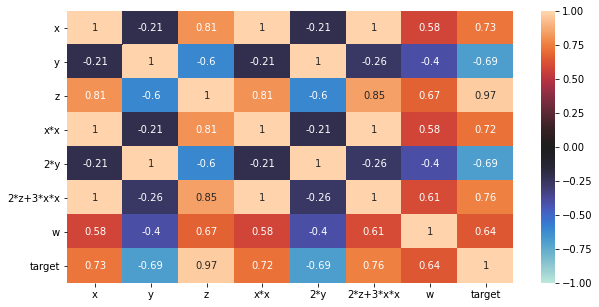

In [8]:
#fig,ax=data.corr( )
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,center=0,vmin=-1,vmax=1)
plt.show()

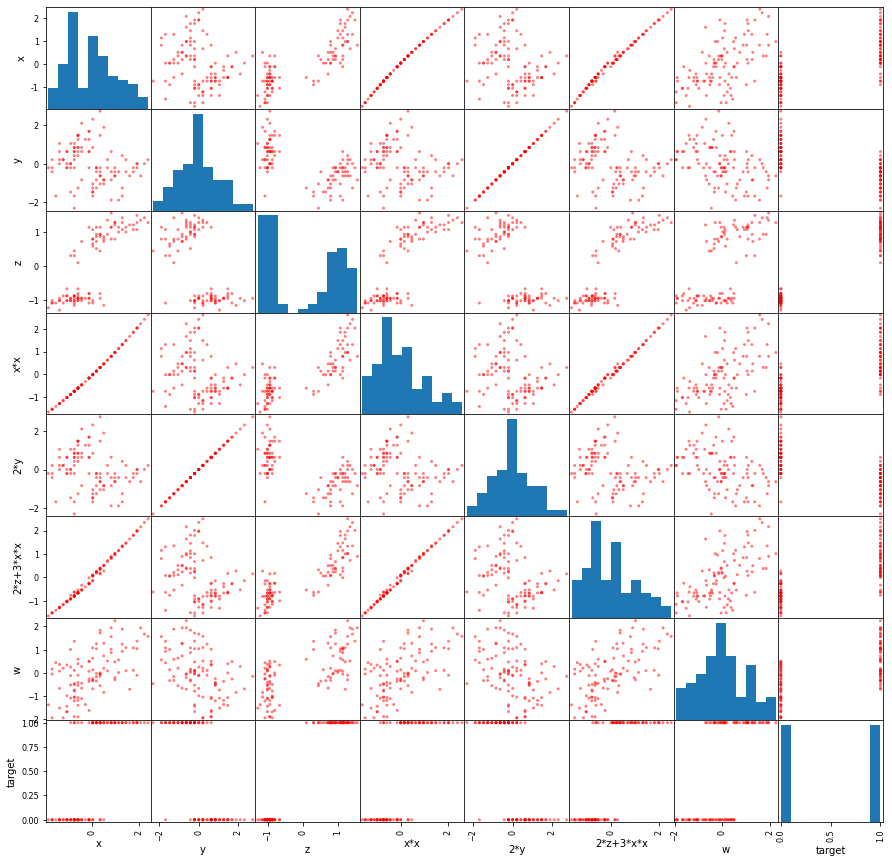

In [11]:
pd.plotting.scatter_matrix(data,figsize=(15,15),color='r',marker='.')
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=1)
model.fit(X,Y)
model.classes_
model.coef_
Y_pred=model.predict(X)
Y_pred_proba=model.predict_proba(X)

In [47]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss='log')
param={'alpha':list(random.sample(range(0, 110), 30))}
classifier=RandomizedSearchCV(estimator=model,param_distributions=param,n_jobs=-1,return_train_score=True,scoring='roc_auc')
classifier.fit(X,Y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=None, penalty='l2',
                                           power_t=0.5, random_state=None,
                                           shuffle=True, tol=0.001,
                                           validation_fraction=0.1, verbose=0,
                                           warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'

In [48]:

pd.DataFrame.from_dict(classifier.cv_results_)
print(classifier.best_params_)
print("best score",classifier.best_score_)
pd.DataFrame.from_dict(classifier.cv_results_).head()

{'alpha': 107}
best score 1.0


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001303,0.000151,0.002115,0.000248,107,{'alpha': 107},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.001576,0.000769,0.002364,0.000793,13,{'alpha': 13},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.001890,0.001600,0.003596,0.001281,53,{'alpha': 53},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.001361,0.000421,0.002145,0.000549,71,{'alpha': 71},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.001071,0.000059,0.002007,0.000248,11,{'alpha': 11},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [85]:
#FROM GRID SEARCH 'best_alpha'=0.0001,'best_score_'=1
best_model=SGDClassifier(loss='log',alpha=98)
best_model.fit(X,Y)
Y_pred=best_model.predict(X)
Y_prob=best_model.predict_proba(X)

coeficient=best_model.coef_
intercept=best_model.intercept_
print("classes",best_model.classes_)
print("best model coef:",best_model.coef_)
print("\nbest model intercept:",best_model.intercept_)

print("predicted class label:",Y_pred[:5])
print("\npredicted probabilities:\n",Y_prob[:5])

classes [0 1]
best model coef: [[ 0.00367405 -0.00349803  0.00490557  0.00362955 -0.00349803  0.00385889
   0.00323838]]

best model intercept: [0.15809155]
predicted class label: [1 1 1 1 1]

predicted probabilities:
 [[0.46540557 0.53459443]
 [0.46434684 0.53565316]
 [0.46534324 0.53465676]
 [0.46586713 0.53413287]
 [0.46632344 0.53367656]]


In [81]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y,Y_pred)
score

0.5

In [91]:
#since classes are balanced lets take threshold=0.5
Y_label=[]
for i in Y_pred:
  if i>= 0.5:
    Y_label.append(1)
  else:
    Y_label.append(0)
print("predicted class label:",Y_label[:5])    

accuracy_by_thresh=accuracy_score(Y,Y_label)
print("accuracy_by_threshold:",accuracy_by_thresh)

predicted class label: [1, 1, 1, 1, 1]
accuracy_by_threshold: 0.5


In [52]:
import random
random.seed(42)
noise=np.random.normal(0.0,0.003,X.shape)
print("noise_shape",noise.shape)
noise[:2]

X_=X+noise
print("X_shape:",X_.shape)
print("\nX_",X_[:5])

noise_shape (100, 7)
X_shape: (100, 7)

X_ [[-0.58071708  0.84418286 -1.0132452  -0.60833468  0.83904542 -0.66388038
  -0.5371081 ]
 [-0.8922774  -0.20610986 -1.01504626 -0.88023901 -0.20873839 -0.91921123
  -0.52734007]
 [-1.20685656  0.2082196  -1.08252734 -1.15616668  0.20979613 -1.16994842
   0.20467524]
 [-1.36137594 -0.00305637 -0.94206207 -1.28686905  0.00417491 -1.2701408
  -0.66343648]
 [-0.73630977  1.05718413 -1.01622534 -0.75332767  1.05418946 -0.78965091
  -0.73557972]]


TRAIN WITH PURTURBATION

In [90]:
#ADDING NOISE OF ORDER 10e-3
print("X_",X_.shape)
print("Y",Y.shape)

X_ (100, 7)
Y (100,)


In [67]:
#Hyperparameter tuning with X_(purturbed data)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
model2=SGDClassifier(loss='log')
#param={'alpha':list(np.arange(0.0001,100,0.01))}
#classifier2=GridSearchCV(estimator=model2,param_grid=param,n_jobs=-1,return_train_score=True,scoring='roc_auc')
param={'alpha':list(random.sample(range(0, 110), 30))}
classifier2=RandomizedSearchCV(estimator=model,param_distributions=param,n_jobs=-1,return_train_score=True,scoring='roc_auc')
classifier2.fit(X_,Y)

print("best parameter:",classifier2.best_params_)
print("best_score",classifier2.best_score_)
pd.DataFrame.from_dict(classifier2.cv_results_).head(2)

best parameter: {'alpha': 63}
best_score 1.0


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002260,0.002254,0.002834,0.000978,63,{'alpha': 63},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.002091,0.001980,0.001851,0.000105,65,{'alpha': 65},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [78]:
alpha=classifier2.best_params_["alpha"]
best_model_=SGDClassifier(loss='log',alpha=alpha)
best_model_.fit(X_,Y)
Y_pred_=best_model_.predict(X_)
print("predicted class labels:",Y_pred_.shape)
Y_proba_=best_model_.predict_proba(X_)
print("\npredicted probability:",Y_proba_.shape)

coeficient_=best_model_.coef_
print("\nbest model coeficient:",best_model_.coef_)
intercept_=best_model_.intercept_
print("intercept:",best_model_.intercept_)

score_=accuracy_score(Y,Y_pred_)
print("accuracy_score:",score_)

predicted class label: (100,)

predicted probability: (100, 2)

best model coeficient: [[ 0.00566855 -0.00540736  0.00757507  0.00559946 -0.00540451  0.00595826
   0.00499807]]
intercept: [0.17289321]
accuracy_score: 0.5


In [88]:
print("percentage change in weights")
(coeficient_-coeficient)*100/coeficient

percentage change in weights


array([[54.28609251, 54.58315438, 54.41785887, 54.27399263, 54.5015793 ,
        54.40353831, 54.33856738]])

In [ ]:
Conclusion: AS WE CAN SEE GIVEN FEATURES HAD COLLINEARITY FROM BEGINING AND WE TRAINED LOGISTIC REGRESSION WITH RANDOM SEARCH (to get alpha optimum)/
THEREON WE TRAINED NEW MODEL AS BEST MODEL WITH BEST HYPERPARAMETER FOUND DURING CV AND GOT WEIGHTS WITH RESPECTIVE MAGNITUDES REPRESENTING FEATURE IMPORTANCE/
BUT DUE TO MULTICOLLINEARITY ONE FEATURE CHANGE LED TO ANOTHER DUE TO INTERCORRELATION HENCE WITH EACH NEW ITERATION FEATURES IMPORTANCES ARE CHANGING/

2) WE PERFORMED PERTUBATION TEST TO CHECK MULTICOLLINEARITY AND ADDED A RANDOM NOISE ( ORDER OF 10E-4) AND PERFORMED SAME STEPS: RANDOM SEARCH CV--->BEST MODEL--->/
TRAIN BEST MODEL ON NOISY DATA-----> AND FOUND FEATURE IMPORTANCE AS COEFFIECENTS .PERCENTAGE CHANGE IN ACTUAL WEIGHTS AND NEW WEIGHTS AFTER PERTURBATION WERE CHANGING DRASTICALLY/
APROX 50% CHANGE HENCE THESE FEATURES CANT BE USED FOR LINEAR MODEL DUE TO PROVEN MULTICOLLINEARITY. 